In [87]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import gmaps
import statsmodels.api as sm

In [88]:
post_secondary_csv = pd.read_csv("post_sec_data_clean.csv")
post_secondary_df = pd.DataFrame(post_secondary_csv)

home_ownership_csv = pd.read_csv("Homeownership_ACS.clean")
home_ownership_df = pd.DataFrame(home_ownership_csv)

In [89]:
home_ownership_df = home_ownership_df[["County", "HOR"]]
post_secondary_df = post_secondary_df[["county","counts"]]
post_secondary_df  = post_secondary_df.rename(columns={"counts": "school_counts"})
home_ownership_df  = home_ownership_df.rename(columns={"County": "county"})

In [90]:
home_ownership_df.head()

,county,HOR
0,"Autauga, AL",73.3
1,"Baldwin, AL",72.9
2,"Barbour, AL",62.5
3,"Bibb, AL",75.4
4,"Blount, AL",78.5


In [91]:
post_secondary_df.head()

,county,school_counts
0,"Los Angeles, CA",228
1,"Cook, IL",125
2,"Maricopa, AZ",92
3,"New York, NY",91
4,"Miami-Dade, FL",88


In [92]:
sample_home_ownership = home_ownership_df.sample(n=1400)
sample_home_ownership = sample_home_ownership.reset_index(drop=True)
sample_home_ownership.head()

,county,HOR
0,"Queen Anne's, MD",81.1
1,"Sanilac, MI",79.9
2,"Coryell, TX",57.6
3,"Pierce, WI",72.8
4,"Beauregard Parish, LA",76.5


In [93]:
post_sec_analysis = sample_home_ownership.merge(post_secondary_df, on="county")
post_sec_analysis.head()

,county,HOR,school_counts
0,"Coryell, TX",57.6,1
1,"Pierce, WI",72.8,1
2,"Donley, TX",74.4,1
3,"Franklin, MA",68.9,1
4,"Rice, KS",72.6,1


In [94]:
len(post_sec_analysis)

622

## Analysis

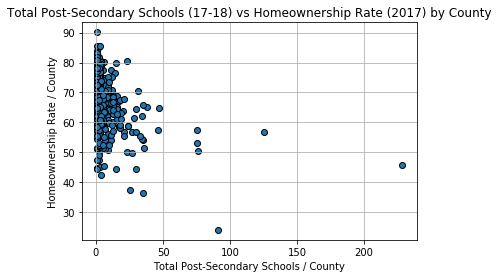

In [95]:
plt.scatter(post_sec_analysis["school_counts"], post_sec_analysis["HOR"], marker="o", edgecolor='black')
plt.title("Total Post-Secondary Schools (17-18) vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate / County")
plt.xlabel("Total Post-Secondary Schools / County")
plt.grid(True)
plt.savefig('Pictures/Post_sec_scatter.png')

In [96]:
y = post_sec_analysis["HOR"]
x = post_sec_analysis["school_counts"]
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    HOR   R-squared (uncentered):                   0.113
Model:                            OLS   Adj. R-squared (uncentered):              0.112
Method:                 Least Squares   F-statistic:                              79.18
Date:                Sat, 07 Sep 2019   Prob (F-statistic):                    6.16e-18
Time:                        14:10:58   Log-Likelihood:                         -3476.0
No. Observations:                 622   AIC:                                      6954.
Df Residuals:                     621   BIC:                                      6958.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
school_counts     1.5844      0.178      8.899      0.000       1.235       1.934
==============================================================================
Omnibus:                      872.679   Durbin-Watson:                   0.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197973.628
Skew:                          -7.395   Prob(JB):                         0.00
Kurtosis:                      89.140   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# Set line
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept

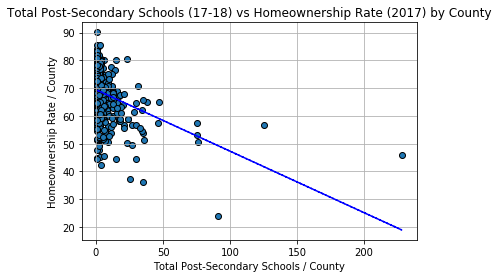

In [98]:
plt.scatter(post_sec_analysis["school_counts"], post_sec_analysis["HOR"], marker="o", edgecolor='black')
plt.title("Total Post-Secondary Schools (17-18) vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate / County")
plt.xlabel("Total Post-Secondary Schools / County")
plt.grid(True)
plt.plot(x, fit, 'b--')
plt.savefig('Pictures/Post_sec_regression.png')